<!--BOOK_INFORMATION-->
<img align="left" style="padding-right:10px;" src="images/book_cover.jpg" width="120">

*This notebook contains an excerpt from the [Python Programming and Numerical Methods - A Guide for Engineers and Scientists](https://www.elsevier.com/books/python-programming-and-numerical-methods/kong/978-0-12-819549-9), the content is also available at [Berkeley Python Numerical Methods](https://pythonnumericalmethods.berkeley.edu/notebooks/Index.html).*

*The copyright of the book belongs to Elsevier. We also have this interactive book online for a better learning experience. The code is released under the [MIT license](https://opensource.org/licenses/MIT). If you find this content useful, please consider supporting the work on [Elsevier](https://www.elsevier.com/books/python-programming-and-numerical-methods/kong/978-0-12-819549-9) or [Amazon](https://www.amazon.com/Python-Programming-Numerical-Methods-Scientists/dp/0128195495/ref=sr_1_1?dchild=1&keywords=Python+Programming+and+Numerical+Methods+-+A+Guide+for+Engineers+and+Scientists&qid=1604761352&sr=8-1)!*

<!--NAVIGATION-->
< [CHAPTER 15.  Eigenvalues and Eigenvectors](chapter15.00-Eigenvalues-and-Eigenvectors.ipynb) | [Contents](Index.ipynb) | [15.2 The Power Method](chapter15.02-The-Power-Method.ipynb)   >

# Eigenvalues and Eigenvectors Problem Statement

## Eigenvalues and eigenvectors 

We learned from last chapter that matrix $A$ apply to column vector $x$, that is $Ax$, is a linear transformation of $x$. There is a special transform in the following form: 

$$Ax = \lambda{x}$$

Where $A$ is $n\times{n}$ matrix, $x$ is $n\times{1}$ column vector ($X\neq{0}$), and $\lambda$ is some scalar. Any $\lambda$ that satisfies the above equation is known as an **eigenvalue** of the matrix $A$, while the associated vector $x$ is called an **eigenvector** corresponding to $\lambda$. 

## The motivation behind

The motivation behind the eigenvalues and eigenvectors is that, it helps us to understand the characteristics of the linear transformation, thus make things easy. We know that a vector $x$ can be transformed to a different vector by multiplying $A$ - $Ax$. The effect of the transformation represents a scale of the length of the vector and/or the rotate of the vector. The above equation points out that  for some vectors, the effect of transformation of $Ax$ is only scale (stretching, compressing, and flipping). The eigenvectors are the vectors have this property and the eigenvalues $\lambda's$ are the scale factors. Let's look at the following example. 

**TRY IT** Plot the vector $x$ = [[1], [1]] and the vector $b = Ax$, where $A$ = [[2, 0], [0, 1]]

In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')

%matplotlib inline

def plot_vect(x, b, xlim, ylim):
    '''
    function to plot two vectors, 
    x - the original vector
    b - the transformed vector
    xlim - the limit for x
    ylim - the limit for y
    '''
    plt.figure(figsize = (10, 6))
    plt.quiver(0,0,x[0],x[1],\
        color='k',angles='xy',\
        scale_units='xy',scale=1,\
        label='Original vector')
    plt.quiver(0,0,b[0],b[1],\
        color='g',angles='xy',\
        scale_units='xy',scale=1,\
        label ='Transformed vector')
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.show()

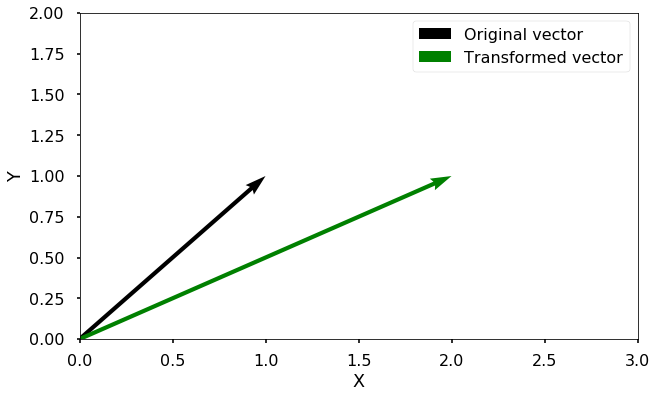

In [2]:
A = np.array([[2, 0],[0, 1]])

x = np.array([[1],[1]])
b = np.dot(A, x)
plot_vect(x,b,(0,3),(0,2))

We can see from the generated figure that the original vector $x$ is rotated and stretched longer after transformed by $A$. The vector [[1], [1]] is transformed to [[2], [1]]. Let's try to do the same exercise with a different vector [[1], [0]]. 

**TRY IT!** Plot the vector $x$ = [[1], [0]] and the vector $b = Ax$, where $A$ = [[2, 0], [0, 1]]

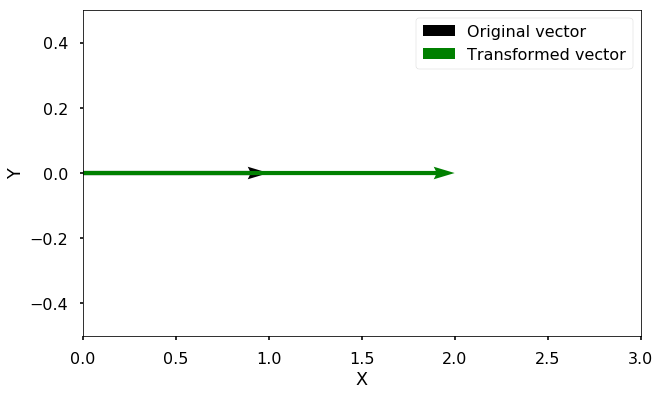

In [3]:
x = np.array([[1], [0]])
b = np.dot(A, x)

plot_vect(x,b,(0,3),(-0.5,0.5))

 Now we can see that with this new vector, the only thing changed after the transformation is the length of the vector, it is stretched. The new vector is [[2], [0]], therefore, the transform is 
 
$$ Ax = 2x$$

with $x$ = [[1], [0]] and $\lambda=2$. The direction of the vector doesn't change at all (no rotation). You can also try that [[0], [1]] is another eigenvector, try to verify by yourself. 

## The characteristic equation

In order to get the eigenvalues and eigenvectors, from $Ax=\lambda{x}$, we can get the following form:

$$(A-\lambda{I})x=0$$

Where $I$ is the identify matrix with the same dimensions as $A$. If matrix $A-\lambda{I}$ has an inverse, then multiply both sides with $(A-\lambda{I})^{-1}$, we get a trivial solution $x=0$. Therefore, when $A-\lambda{I}$ is singular (no inverse exist), we have a nontrivial solution, which means that the determinant is zero:

$$det(A-\lambda{I})=0$$

this equation is called **characteristic equation**, which will lead to a polynomial equation for $\lambda$, then we can solve for the eigenvalues. Let's look at one example. 

**TRY IT!** Get the eigenvalues for matrix [[0, 2], [2, 3]]

The characteristic equation gives us 

$$
\begin{vmatrix}
0-\lambda & 2 \\ 
2 & 3-\lambda
\end{vmatrix}
=0
$$

Therefore, we have 

$$-\lambda(3-\lambda)-4 = 0 \Rightarrow \lambda^2-3\lambda-4=0$$

We get two eigenvalues:

$$\lambda_1 = 4, \lambda_2 = -1$$

**TRY IT!** Get the eigenvectors for the above two eigenvalues. 

Let's get the first eigenvector when $\lambda_1 = 4$, we can simply insert it back to $A-\lambda{I}=0$, where we have:

$$
\begin{bmatrix}
-4 & 2 \\
2 & -1 \\
\end{bmatrix}
\begin{bmatrix}
x_1\\x_2\\
\end{bmatrix}
=\begin{bmatrix}
0\\0\\
\end{bmatrix}
$$

Therefore, we have two equations $-4x_1+2x_2=0$ and $2x_1-x_2=0$, both of them indicate that $x_2=2x_1$. Therefore, we can have the first eigenvector as 

$$x_1 = k_1\begin{bmatrix}
1\\2\\
\end{bmatrix}$$

$k_1$ is a scalar vector ($k_1 \neq 0$), as long as we have the ratio between $x_2$ and $x_1$ as 2, it will be an eigenvector. We can verify the vector [[1], [2]] is an eigenvector by inserting it back:

$$
\begin{bmatrix}
0 & 2 \\
2 & 3 \\
\end{bmatrix}
\begin{bmatrix}
1\\2\\
\end{bmatrix}
=\begin{bmatrix}
4\\8\\
\end{bmatrix}
=4\begin{bmatrix}
1\\2\\
\end{bmatrix}
$$

By inserting $\lambda_2=-1$ similarly as above, we can get the other eigenvector as the following, where $k_2 \neq 0$:
$$x_2 = k_2\begin{bmatrix}
-2\\1\\
\end{bmatrix}$$

From the above example, we can see how can we get the eigenvalues and eigenvectors from a matrix $A$, and the chosen of the eigenvectors for a system is not unique. But things will become really complicated when you have a larger matrix $A$ when you try to solve the $n^{th}$ order polynomial characteristic equation. Luckily, there are many different numerical methods have been developed to solve the eigenvalue problems for larger matrices. We will introduce the power method and the QR method in the next two sections. 

<!--NAVIGATION-->
< [CHAPTER 15.  Eigenvalues and Eigenvectors](chapter15.00-Eigenvalues-and-Eigenvectors.ipynb) | [Contents](Index.ipynb) | [15.2 The Power Method](chapter15.02-The-Power-Method.ipynb)   >